# 토크나이저

In [1]:
%pip install transformers

  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   ---------------------------------------- 10.5/10.5 MB 72.8 MB/s eta 0:00:00
Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl (2.4 MB)
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)
Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl (308 kB)

   ---------------- ----------------------- 2/5 [huggingface-hub]
   ---------------- ----------------------- 2/5 [huggingface-hub]
   ------------------------ --------------- 3/5 [tokenizers]
   -------------------------------- ------- 4/5 [transformers]
   -------------------------------- ------- 4/5 [transformers]
   -------------------------------- ------- 4/5 [transformers]
   -------------------------------- ------- 4/5 [tra

In [3]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I have this so much",
]

inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="tf")

In [4]:
print(inputs)

{'input_ids': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662,
        12172,  2607,  2026,  2878,  2166,  1012,   102],
       [  101,  1045,  2031,  2023,  2061,  2172,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>}


## 수동 토크나이징

In [ ]:
from transformers import AutoTokenizer

# 사용할 사전학습 모델 이름 (감정 분석용으로 파인튜닝된 DistilBERT)
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

# 해당 모델에 맞는 토크나이저를 허깅페이스에서 불러옴
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# 입력할 문장들
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I have this so much",
]

# 각 문장을 토큰화 (WordPiece 단위로 쪼갬)
tokens = [tokenizer.tokenize(sentence) for sentence in raw_inputs]
print(tokens)

# 토큰들을 숫자 ID로 변환 (모델이 이해할 수 있게)
ids = [tokenizer.convert_tokens_to_ids(token) for token in tokens]

# 첫 번째 문장의 토큰 ID 출력
print(ids[0])

# 두 번째 문장의 토큰 ID 출력
print(ids[1])

# 전체 문장을 토크나이즈 + 숫자화 + 패딩 처리까지 해서 딕셔너리로 반환
# 이 결과는 모델에 바로 입력할 수 있는 형태임 (input_ids, attention_mask 등 포함)
print(tokenizer(raw_inputs, padding=True))

[['i', "'", 've', 'been', 'waiting', 'for', 'a', 'hugging', '##face', 'course', 'my', 'whole', 'life', '.'], ['i', 'have', 'this', 'so', 'much']]
[1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]
[1045, 2031, 2023, 2061, 2172]
{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], [101, 1045, 2031, 2023, 2061, 2172, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [7]:
%pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ------ --------------------------------- 3.9/24.0 MB 19.5 MB/s eta 0:00:02
   ------------------------------------- -- 22.3/24.0 MB 54.2 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 52.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 15.5/15.5 MB 88.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   -------------------- ------------------- 23.6/45.9 MB 114.9 MB/s eta 0:00:01
   ---------------------------------------  45.9/45.9 MB 117.0 MB/s eta 0:00:01
   ---------------------------------------- 45.9/45.9 MB 97.5 MB/s eta 0:00:00

  Attempting uninstall: numpy

    Found existing installation: numpy 2.1.3

   ---------- ----------------------------- 1/4 [numpy]
    Uninstalling numpy-2.1.3:
   ---------- ----------------------------- 1/4 [numpy]
   ---------- --

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [9]:
%pip install --upgrade numpy gensim

  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
from gensim.models import Word2Vec

# 학습에 사용할 예시 문장들을 단어 단위로 쪼개서 리스트로 표현
sentences = [["I", "love", "NLP"], ["Word2Vec", "is", "awesome"]]

# Word2Vec 모델 학습
# - vector_size: 단어 임베딩 벡터의 차원 (여기서는 100차원)
# - window: 주변 단어를 볼 범위 (앞뒤로 5개씩)
# - min_count: 해당 단어가 최소 몇 번 나와야 학습할지 (여기선 1번만 나와도 학습)
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)

# 단어 'NLP'의 임베딩 벡터를 가져옴
vector = model.wv["NLP"]

# 벡터 출력 (100차원짜리 float 숫자 배열)
print(vector)

[-8.2426779e-03  9.2993546e-03 -1.9766092e-04 -1.9672764e-03
  4.6036304e-03 -4.0953159e-03  2.7431143e-03  6.9399667e-03
  6.0654259e-03 -7.5107943e-03  9.3823504e-03  4.6718083e-03
  3.9661205e-03 -6.2435055e-03  8.4599797e-03 -2.1501649e-03
  8.8251876e-03 -5.3620026e-03 -8.1294188e-03  6.8245591e-03
  1.6711927e-03 -2.1985089e-03  9.5136007e-03  9.4938548e-03
 -9.7740470e-03  2.5052286e-03  6.1566923e-03  3.8724565e-03
  2.0227872e-03  4.3050171e-04  6.7363144e-04 -3.8206363e-03
 -7.1402504e-03 -2.0888723e-03  3.9238976e-03  8.8186832e-03
  9.2591504e-03 -5.9759365e-03 -9.4026709e-03  9.7643770e-03
  3.4297847e-03  5.1661171e-03  6.2823449e-03 -2.8042626e-03
  7.3227035e-03  2.8302716e-03  2.8710044e-03 -2.3803699e-03
 -3.1282497e-03 -2.3701417e-03  4.2764368e-03  7.6057913e-05
 -9.5842788e-03 -9.6655441e-03 -6.1481940e-03 -1.2856961e-04
  1.9974159e-03  9.4319675e-03  5.5843508e-03 -4.2906962e-03
  2.7831673e-04  4.9643586e-03  7.6983096e-03 -1.1442233e-03
  4.3234206e-03 -5.81437

# 토크나이저와 word2vec 사용

In [5]:
%pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 40.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk

nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\main\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize  # 단어 단위로 문장을 나누기 위한 토크나이저
from gensim.models import Word2Vec  # Word2Vec 임베딩 모델 클래스

# 학습에 사용할 문장들 (자연어처리, 워드임베딩 관련 문장)
sentences = [
    "I love natural language processing",
    "Word2Vec is a popular word embedding model",
    "Natural language processing is an important field in AI",
]

# 각 문장을 단어 단위로 토큰화함
# 예: "I love NLP" -> ["I", "love", "NLP"]
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# 토큰화된 문장 확인
print(tokenized_sentences)

[['I', 'love', 'natural', 'language', 'processing'], ['Word2Vec', 'is', 'a', 'popular', 'word', 'embedding', 'model'], ['Natural', 'language', 'processing', 'is', 'an', 'important', 'field', 'in', 'AI']]


In [ ]:
# Word2Vec 모델 학습
# - vector_size: 단어 벡터의 차원 수 (100차원 벡터)
# - window: 한 단어 기준으로 앞뒤 몇 개의 단어까지 함께 고려할지 (여기선 5개)
# - min_count: 최소 등장 횟수가 이보다 적은 단어는 학습 대상에서 제외 (여기선 1 → 전부 포함)
model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1)

# 학습된 단어 벡터들을 접근할 수 있는 객체
word_vectors = model.wv

# "language"라는 단어의 임베딩 벡터 출력 (100차원짜리 실수 리스트)
print(word_vectors["language"])

[-5.3780823e-04  2.3722864e-04  5.1040910e-03  9.0102609e-03
 -9.3020601e-03 -7.1179681e-03  6.4588394e-03  8.9740995e-03
 -5.0159963e-03 -3.7642447e-03  7.3804674e-03 -1.5347273e-03
 -4.5378106e-03  6.5551274e-03 -4.8596673e-03 -1.8148653e-03
  2.8774342e-03  9.9292281e-04 -8.2860254e-03 -9.4493292e-03
  7.3125120e-03  5.0700661e-03  6.7592775e-03  7.6191645e-04
  6.3517732e-03 -3.4046052e-03 -9.4711396e-04  5.7690116e-03
 -7.5220009e-03 -3.9353538e-03 -7.5102169e-03 -9.3084743e-04
  9.5383907e-03 -7.3201652e-03 -2.3331069e-03 -1.9370844e-03
  8.0786459e-03 -5.9302277e-03  4.5893696e-05 -4.7526849e-03
 -9.6026389e-03  5.0062062e-03 -8.7609617e-03 -4.3915613e-03
 -3.5224024e-05 -2.9514002e-04 -7.6609026e-03  9.6143829e-03
  4.9826237e-03  9.2333835e-03 -8.1571704e-03  4.4943946e-03
 -4.1372897e-03  8.2511746e-04  8.4984917e-03 -4.4609406e-03
  4.5189071e-03 -6.7863516e-03 -3.5486098e-03  9.3998490e-03
 -1.5785332e-03  3.2206855e-04 -4.1410322e-03 -7.6832231e-03
 -1.5072766e-03  2.47044

# IMDB 데이터셋
- 총 5만개의 영화리뷰 구성
- 긍정 과 부정 각각 2.5만개의 리뷰 구성
- 각 리뷰는 단어들의 시퀀스로 표현, 각 단어는 정수로 인코딩 되어있음

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input

# 하이퍼파라미터 설정
MY_LENGTH = 80  # 각 영화 리뷰에서 사용할 최대 단어 수 (패딩 길이)
MY_WORD = 5000  # 사용할 상위 단어 수 (단어 인덱스 기준)
MY_SAMPLE = 10  # 샘플로 출력할 리뷰 인덱스

2025-06-04 12:32:36.680435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749007956.746687    7508 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749007956.771161    7508 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749007956.947015    7508 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749007956.947047    7508 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749007956.947048    7508 computation_placer.cc:177] computation placer alr

In [ ]:
# IMDB 데이터셋 로드 (전체 데이터, 제한 없이)
(X_train, y_train), (X_test, y_test) = imdb.load_data()

# 전체 단어 수 확인용
word_set = set()
for review in X_train + X_test:
    word_set.update(review)

num_words = len(word_set)
print(f"단어 종류의 수 : {num_words}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
단어 종류의 수 : 88585


In [ ]:
# 사전 상위 MY_WORD개의 단어만 사용하는 데이터 재로드
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=MY_WORD)

# 10번째 샘플 출력
print(f"샘플 영화평 : \n{X_train[MY_SAMPLE]}")
print(f"총 단어 수 :\n{len(X_train[MY_SAMPLE])}")
print(f"감성(0=부정, 1=긍정) \n{y_train[MY_SAMPLE]}")

샘플 영화평 : 
[1, 785, 189, 438, 47, 110, 142, 7, 6, 2, 120, 4, 236, 378, 7, 153, 19, 87, 108, 141, 17, 1004, 5, 2, 883, 2, 23, 8, 4, 136, 2, 2, 4, 2, 43, 1076, 21, 1407, 419, 5, 2, 120, 91, 682, 189, 2818, 5, 9, 1348, 31, 7, 4, 118, 785, 189, 108, 126, 93, 2, 16, 540, 324, 23, 6, 364, 352, 21, 14, 9, 93, 56, 18, 11, 230, 53, 771, 74, 31, 34, 4, 2834, 7, 4, 22, 5, 14, 11, 471, 9, 2, 34, 4, 321, 487, 5, 116, 15, 2, 4, 22, 9, 6, 2286, 4, 114, 2679, 23, 107, 293, 1008, 1172, 5, 328, 1236, 4, 1375, 109, 9, 6, 132, 773, 2, 1412, 8, 1172, 18, 2, 29, 9, 276, 11, 6, 2768, 19, 289, 409, 4, 2, 2140, 2, 648, 1430, 2, 2, 5, 27, 3000, 1432, 2, 103, 6, 346, 137, 11, 4, 2768, 295, 36, 2, 725, 6, 3208, 273, 11, 4, 1513, 15, 1367, 35, 154, 2, 103, 2, 173, 7, 12, 36, 515, 3547, 94, 2547, 1722, 5, 3547, 36, 203, 30, 502, 8, 361, 12, 8, 989, 143, 4, 1172, 3404, 10, 10, 328, 1236, 9, 6, 55, 221, 2989, 5, 146, 165, 179, 770, 15, 50, 713, 53, 108, 448, 23, 12, 17, 225, 38, 76, 4397, 18, 183, 8, 81, 19, 12, 45, 1

In [ ]:
# 단어 인덱스 딕셔너리 불러오기 (word → index)
word_index = imdb.get_word_index()
# index → word 딕셔너리로 바꾸기
index_to_word = {index: word for word, index in word_index.items()}

# 숫자 인덱스를 다시 단어로 디코딩하여 문장 출력
decoded_review = " ".join(
    index_to_word.get(index - 3, "?") for index in X_train[MY_SAMPLE]
)  # -3은 특별 토큰 오프셋
print(f"샘플 영화 평\n{decoded_review}")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
샘플 영화 평
the clear fact entertaining there life back br is and show of performance stars br actors film him many should movie reasons to and reading and are in of scenes and and of and out compared not boss yes to and show its disappointed fact raw to it justice by br of where clear fact many your way and with city nice are is along wrong not as it way she but this anything up haven't been by who of choices br of you to as this i'd it and who of shot you'll to love for and of you it is sequels of little quest are seen watched front chemistry to simply alive of chris being it is say easy and cry in chemistry but and all it maybe this is wing film job live of and relief and level names and and to be stops serial and watch is men go this of wing american from and moving is accepted put this of jerry for places so work and watch and lot br that from sometimes wondered make department introduced to wondered from action at turns in low that in 

In [ ]:
# 상위 단어 목록 출력
top_words = [word for word, index in word_index.items() if index <= MY_WORD]
print(f"상위 {MY_WORD}개의 단어 목록:")
for i, word in enumerate(top_words):
    print(i + 1, word)

상위 5000개의 단어 목록:
1 woods
2 hanging
3 woody
4 bringing
5 wooden
6 errors
7 dialogs
8 kids
9 want
10 travel
11 dinosaurs
12 wrong
13 subplots
14 fit
15 screaming
16 fix
17 effects
18 disturbed
19 purpose
20 needed
21 master
22 feeling
23 cinematic
24 tech
25 saying
26 altogether
27 nicely
28 mummy
29 lots
30 nature
31 superficial
32 extent
33 much
34 doubts
35 spin
36 hong
37 corporate
38 hal
39 ham
40 had
41 has
42 hat
43 crowd
44 bottom
45 starring
46 shoots
47 raped
48 explosions
49 chain
50 whoever
51 chair
52 ballet
53 jerk
54 locked
55 exact
56 minute
57 unintentionally
58 cusack
59 opposed
60 following
61 convincingly
62 surfing
63 jim
64 seriously
65 spoken
66 concert
67 wandering
68 turned
69 turner
70 opposite
71 imagined
72 menacing
73 convoluted
74 west
75 motives
76 photos
77 technology
78 visually
79 being
80 substance
81 with
82 rage
83 dirty
84 watches
85 watched
86 tricks
87 caused
88 causes
89 portrays
90 more
91 company
92 learn
93 huge
94 hugh
95 paper
96 scott
97 gad

In [ ]:
# 시퀀스 패딩 (길이 맞춰주기)
X_train = pad_sequences(
    sequences=X_train, truncating="post", padding="post", maxlen=MY_LENGTH
)
X_test = pad_sequences(
    sequences=X_test, truncating="post", padding="post", maxlen=MY_LENGTH
)

# 입력/출력 형태 확인
print(f"\n학습용 입력 데이터 모양 : {X_train.shape}")
print(f"학습용 출력 데이터 모양 : {y_train.shape}")
print(f"평가용 입력 데이터 모양 : {X_test.shape}")
print(f"평가용 출력 데이터 모양 : {y_test.shape}")


학습용 입력 데이터 모양 : (25000, 80)
학습용 출력 데이터 모양 : (25000,)
평가용 입력 데이터 모양 : (25000, 80)
평가용 출력 데이터 모양 : (25000,)


In [ ]:
# RNN 모델 구성
model = Sequential()
model.add(Input(shape=(MY_LENGTH,)))  # 입력 길이만 명시
model.add(Embedding(input_dim=MY_WORD, output_dim=32))  # 단어 임베딩 (32차원)
model.add(LSTM(units=64))  # LSTM 층 (64개의 유닛)
model.add(Dense(units=1, activation="sigmoid"))  # 이진 분류용 출력층

# 모델 요약 출력
print("RNN 요약")
model.summary()

I0000 00:00:1749007978.433768    7508 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


RNN 요약


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 80, 32)         │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,897 (722.25 KB)

 Trainable params: 184,897 (722.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

# 학습 시작
print("\n학습 시작")
model.fit(x=X_train, y=y_train, epochs=10, batch_size=200, verbose=1)


학습 시작
Epoch 1/10


I0000 00:00:1749007985.899665    7668 cuda_dnn.cc:529] Loaded cuDNN version 90501


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.6099 - loss: 0.6347
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.8228 - loss: 0.3999
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.8560 - loss: 0.3342
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.8697 - loss: 0.3179
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.8815 - loss: 0.2917
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.8843 - loss: 0.2895
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.8937 - loss: 0.2625
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.9064 - loss: 0.2304
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.9137 - loss: 0.2190
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.9230 - loss: 0.1972


In [ ]:
# 평가
score = model.evaluate(x=X_test, y=y_test, verbose=1)
print(f"최종 정확도 : {score[1]:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.7716 - loss: 0.5539
최종 정확도 : 0.77


In [ ]:
# 샘플 입력에 대한 예측
test = X_test[MY_SAMPLE].reshape(1, MY_LENGTH)  # 2D로 reshape
pred = model.predict(test)
pred = pred > 0.5  # 0.5 초과면 긍정(True), 이하면 부정(False)

# 예측 결과 출력
print(f"\n 샘플 영화평 : \n{test}")
print(f"RNN 감성 예측 : {pred}")
print(f"정답(0, 부정 1, 긍정) {y_test[MY_SAMPLE]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

 샘플 영화평 : 
[[   1 1581   34    2    2   23    6 1374 1120    7  107  349    2 1496
    11    2   18  397 3767    7    4  107   84    2   56   68  456 1402
     2   39    4 1374    9   35  204    5   55 4412  212  193   23    4
   326   45    6 1109    8 1738    2   15   29  199 1040    5 2684   11
    14 1403  212 1528   10   10 2160    2    9    4  452   37    2    4
   598  425    5   45 4394  138   59  214  467    4]]
RNN 감성 예측 : [[ True]]
정답(0, 부정 1, 긍정) 1


# 위 코드 개선하기

In [13]:
%pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 37.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 37.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [8]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 하이퍼파라미터 설정
MY_LENGTH = 80  # 각 영화평에서 사용할 단어 수
MY_WORD = 5000  # 사전에 포함할 단어 수 (상위 5000개 단어만 사용)
MY_SAMPLE = 10  # 샘플 인덱스 (10번째 영화평)

# IMDB 데이터셋 로드 (상위 5000개 단어만 포함)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MY_WORD)

# 단어 인덱스를 단어로 복원할 수 있는 딕셔너리 생성
word_index = imdb.get_word_index()
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = "<PAD>"
index_to_word[1] = "<START>"
index_to_word[2] = "<UNK>"

# 샘플 영화평 디코딩해서 출력
decoded_review = " ".join(index_to_word.get(index, "?") for index in x_train[MY_SAMPLE])
print("샘플 영화평:", decoded_review)

# 시퀀스 길이를 고정 (패딩 및 잘라내기)
x_train = pad_sequences(
    sequences=x_train, truncating="post", padding="post", maxlen=MY_LENGTH
)
x_test = pad_sequences(
    sequences=x_test, truncating="post", padding="post", maxlen=MY_LENGTH
)

# 데이터 형태 출력
print("\n학습용 입력 데이터 모양:", x_train.shape)
print("학습용 출력 데이터 모양:", y_train.shape)
print("평가용 입력 데이터 모양:", x_test.shape)
print("평가용 출력 데이터 모양:", y_test.shape)

# RNN 모델 정의
model = Sequential()

# 1️⃣ 임베딩 레이어 (출력 차원 64로 설정)
model.add(Embedding(input_dim=MY_WORD, output_dim=64, input_length=MY_LENGTH))

# 2️⃣ 양방향 LSTM (중간 시퀀스 출력 유지)
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Dropout(0.5))  # 과적합 방지용 Dropout

# 3️⃣ 두 번째 LSTM 층 (출력만 유지)
model.add(LSTM(units=32))
model.add(Dropout(0.5))  # 추가 Dropout

# 4️⃣ 최종 출력층 (이진 분류용 sigmoid)
model.add(Dense(units=1, activation="sigmoid"))

# 모델 구조 출력
print("\nRNN 모델 요약:")
model.summary()

# 5️⃣ 옵티마이저 설정 (RMSprop 사용)
opt = RMSprop(learning_rate=0.001)

# 모델 컴파일
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["acc"])

# 6️⃣ 학습 진행
print("\n학습 시작")
history = model.fit(
    x=x_train, y=y_train, epochs=10, batch_size=200, verbose=1, validation_split=0.2
)

# 7️⃣ 테스트 데이터로 평가
score = model.evaluate(x=x_test, y=y_test, verbose=1)
print("최종 정확도: {:.2f}".format(score[1]))

샘플 영화평: <START> french horror cinema has seen something of a <UNK> over the last couple of years with great films such as inside and <UNK> romance <UNK> on to the scene <UNK> <UNK> the <UNK> just slightly but stands head and <UNK> over most modern horror titles and is surely one of the best french horror films ever made <UNK> was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is <UNK> by the excellent writing and acting that <UNK> the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named <UNK> sent to prison for <UNK> he is put in a cell with three others the <UNK> insane <UNK> body building <UNK> <UNK> and his retarded boyfriend <UNK> after a short while in the cell together they <UNK> upon a hiding place in the wall that contains an old <UNK> after <UNK> part of it they soon realise its magical powers and realise they may be able to use it to bre

/home/main/anaconda3/envs/tf_env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


학습 시작
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.5143 - loss: 0.6920 - val_acc: 0.5738 - val_loss: 0.7078
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - acc: 0.6601 - loss: 0.6302 - val_acc: 0.7694 - val_loss: 0.5022
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.7497 - loss: 0.5245 - val_acc: 0.6326 - val_loss: 0.6549
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.7881 - loss: 0.4764 - val_acc: 0.7310 - val_loss: 0.5759
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - acc: 0.8060 - loss: 0.4348 - val_acc: 0.7784 - val_loss: 0.4906
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.8193 - loss: 0.4158 - val_acc: 0.8094 - val_loss: 0.4292
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.8310 - loss: 0.3907 - val_acc: 0.8134 - val_loss: 0.4153
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.8526 - loss: 0.3562 - val_acc: 0.8096 - val_loss: 0.4443
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2

## 더욱개선!

▶ 학습용 입력 데이터 모양: (25000, 80)
▶ 학습용 출력 데이터 모양: (25000,)
▶ 평가용 입력 데이터 모양: (25000, 80)
▶ 평가용 출력 데이터 모양: (25000,)

=== [Baseline] 모델 학습 시작 ===
Epoch 1/10


/home/main/anaconda3/envs/tf_env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.5140 - loss: 0.6926 - val_acc: 0.6050 - val_loss: 0.6750
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.6418 - loss: 0.6302 - val_acc: 0.7560 - val_loss: 0.4944
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.7631 - loss: 0.5022 - val_acc: 0.7850 - val_loss: 0.4552
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.7900 - loss: 0.4529 - val_acc: 0.7876 - val_loss: 0.4576
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.7942 - loss: 0.4541 - val_acc: 0.8030 - val_loss: 0.4228
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.8234 - loss: 0.3998 - val_acc: 0.8114 - val_loss: 0.4135
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.8354 - loss: 0.3770 - val_acc: 0.7808 - val_loss: 0.4783
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.8555 - loss: 0.3530 - val_acc: 0.7896 - val_loss: 0.4614
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc:

100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 840ms/step - acc: 0.5138 - loss: 0.6924 - val_acc: 0.5870 - val_loss: 0.6666
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 749ms/step - acc: 0.6555 - loss: 0.6306

100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 846ms/step - acc: 0.6558 - loss: 0.6303 - val_acc: 0.7496 - val_loss: 0.5317
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - acc: 0.7557 - loss: 0.5299

100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 826ms/step - acc: 0.7558 - loss: 0.5298 - val_acc: 0.7730 - val_loss: 0.4936
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 748ms/step - acc: 0.7908 - loss: 0.4737

100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 815ms/step - acc: 0.7908 - loss: 0.4738 - val_acc: 0.7948 - val_loss: 0.4583
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 813ms/step - acc: 0.8059 - loss: 0.4549 - val_acc: 0.7608 - val_loss: 0.5079
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - acc: 0.8129 - loss: 0.4342

100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 792ms/step - acc: 0.8129 - loss: 0.4342 - val_acc: 0.8054 - val_loss: 0.4387
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 759ms/step - acc: 0.8264 - loss: 0.4150 - val_acc: 0.8022 - val_loss: 0.4569
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 759ms/step - acc: 0.8355 - loss: 0.3992 - val_acc: 0.7896 - val_loss: 0.4864
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 788ms/step - acc: 0.8453 - loss: 0.3820 - val_acc: 0.8034 - val_loss: 0.4448
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 794ms/step - acc: 0.8437 - loss: 0.3787 - val_acc: 0.7434 - val_loss: 0.5547
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 767ms/step - acc: 0.8529 - loss: 0.3646 - val_acc: 0.7944 - val_loss: 0.4544

=== [Improved] 모델 평가 ===
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 253ms/step - acc: 0.7924 - loss: 0.4556
[Improved] Test Accuracy: 0.7886
782/782 ━━━━━━━━━━━━━━━━━━━━ 197s 251ms/step

--- [Improved] Confusion Matrix ---
[[10206  2294]
 [ 2991  9509]]

--- [Improved] Classification Report

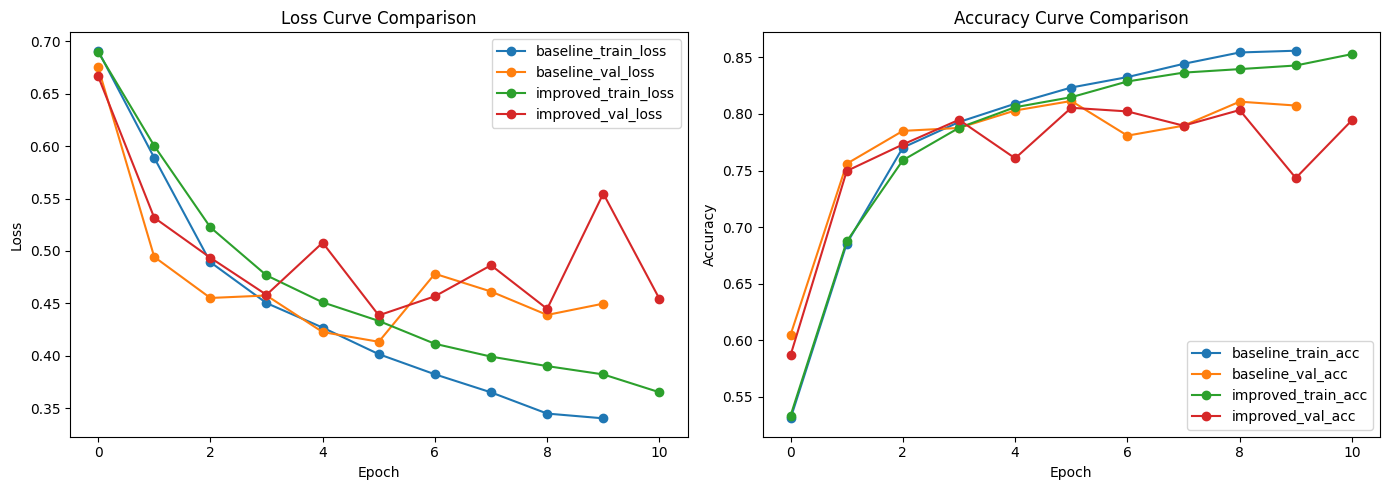

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding,
    LSTM,
    Dense,
    Dropout,
    Bidirectional,
    Input,
)
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

# =============================================================
# 1) 데이터 로드 및 전처리
# =============================================================
MY_LENGTH = (
    80  # ▶ 각 영화 평 문장을 이 길이로 자르거나 0으로 채운다 (padding/truncating)
)
MY_WORD = 5000  # ▶ 자주 등장하는 상위 5000개 단어만 사용

# IMDB 데이터셋 로드 (num_words=MY_WORD → 상위 5000개 단어만 사용)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MY_WORD)

# 패딩 후, 길이가 MY_LENGTH 보다 짧으면 0으로 뒤채우고,
# 길면 뒤에서부터 자른다 (truncating='post', padding='post')
x_train = pad_sequences(x_train, maxlen=MY_LENGTH, padding="post", truncating="post")
x_test = pad_sequences(x_test, maxlen=MY_LENGTH, padding="post", truncating="post")

print("▶ 학습용 입력 데이터 모양:", x_train.shape)
print("▶ 학습용 출력 데이터 모양:", y_train.shape)
print("▶ 평가용 입력 데이터 모양:", x_test.shape)
print("▶ 평가용 출력 데이터 모양:", y_test.shape)
# =============================================================


# =============================================================
# 2) 베이스라인 모델 정의 · 학습 · 평가
# -------------------------------------------------------------
#   Baseline: Embedding(32) → LSTM(64) → Dense(1, sigmoid)
#   - 임베딩 차원(output_dim)=32            → 단어 의미 표현은 적당히 되지만,
#                                            더 풍부한 정보를 원하면 값이 작다.
#   - LSTM 유닛(units)=64                    → 단방향 LSTM으로 앞→뒤 정보만 학습
#   - Dropout, Bidirectional, Stacked LSTM 등 모두 미적용
#   - EarlyStopping, ReduceLROnPlateau 미적용
# =============================================================
baseline = Sequential(
    [
        Input(shape=(MY_LENGTH,)),
        Embedding(
            input_dim=MY_WORD, output_dim=32, input_length=MY_LENGTH
        ),  # Embedding 차원 32
        LSTM(units=64),  # 단방향 LSTM
        Dense(units=1, activation="sigmoid"),
    ]
)

baseline.compile(
    optimizer=RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics=["acc"]
)

print("\n=== [Baseline] 모델 학습 시작 ===")
history_baseline = baseline.fit(
    x_train, y_train, epochs=10, batch_size=200, validation_split=0.2, verbose=1
)

print("\n=== [Baseline] 모델 평가 ===")
score_baseline = baseline.evaluate(x_test, y_test, verbose=1)
print(f"[Baseline] Test Accuracy: {score_baseline[1]:.4f}")

# 예측(0/1) 값 생성
y_pred_base_prob = baseline.predict(x_test)
y_pred_base = (y_pred_base_prob > 0.5).astype(int).reshape(-1)

cm_base = confusion_matrix(y_test, y_pred_base)
cr_base = classification_report(y_test, y_pred_base, target_names=["부정", "긍정"])

print("\n--- [Baseline] Confusion Matrix ---")
print(cm_base)
print("\n--- [Baseline] Classification Report ---")
print(cr_base)
# =============================================================


# =============================================================
# 3) 개선된 모델 정의 · 학습 · 평가
# -------------------------------------------------------------
#   Improved:
#     1) Embedding 차원 확장 → output_dim=64    (단어 의미 표현 강화)
#     2) Bidirectional LSTM 적용                  (앞뒤 문맥 모두 학습 → 감정 분류 성능 상승)
#     3) Stacked LSTM 구성 (첫 번째 BiLSTM → 두 번째 LSTM)
#          → return_sequences=True 설정         (깊은 표현 학습, 단점: 과적합 우려)
#     4) 내부 dropout/recurrent_dropout 활용      (입력/순환 연결 과적합 억제)
#     5) 레이어 사이 Dropout 추가                (과적합 방지)
#     6) EarlyStopping & ReduceLROnPlateau 적용  (학습 안정화, 과적합 조기 종료)
#     7) ModelCheckpoint 사용                     (가장 좋은 검증 성능 순간 저장)
# =============================================================
improved = Sequential()
# ——————————————————————————————————————————————
# ➤ Embedding 차원 확장 (32→64)
# ——————————————————————————————————————————————
improved.add(Input(shape=(MY_LENGTH,)))
improved.add(
    Embedding(input_dim=MY_WORD, output_dim=64)
)  # output_dim=64 (공간 넓혀 단어 의미 풍부히 표현)

# ——————————————————————————————————————————————
# ➤ Bidirectional LSTM 첫 번째 층
#   - units=64
#   - return_sequences=True (Stacked LSTM 연결을 위해 중간 시퀀스를 유지)
#   - dropout=0.3           (입력 Dropout)
#   - recurrent_dropout=0.3 (순환 연결 Dropout)
# ——————————————————————————————————————————————
improved.add(
    Bidirectional(
        LSTM(units=64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)
    )
)

# ——————————————————————————————————————————————
# ➤ 두 번째 LSTM 층
#   - units=32
#   - dropout=0.3, recurrent_dropout=0.3
# ——————————————————————————————————————————————
improved.add(LSTM(units=32, dropout=0.3, recurrent_dropout=0.3))

# ——————————————————————————————————————————————
# ➤ 최종 출력층
# ——————————————————————————————————————————————
improved.add(Dense(units=1, activation="sigmoid"))

# ——————————————————————————————————————————————
# 컴파일
# ——————————————————————————————————————————————
improved.compile(
    optimizer=RMSprop(
        learning_rate=0.001
    ),  # RMSprop: LSTM 계열에서 자주 쓰이는 옵티마이저
    loss="binary_crossentropy",
    metrics=["acc"],
)

# ——————————————————————————————————————————————
# 콜백(Callbacks) 설정
# 1) EarlyStopping: val_loss 기준으로 2 에폭 동안 개선 없으면 중단, 최고 가중치 복원
# 3) ModelCheckpoint: val_acc 기준 가장 좋은 순간 모델 저장
# ——————————————————————————————————————————————
es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
mc = ModelCheckpoint(
    "best_improved_model.h5", monitor="val_acc", save_best_only=True, mode="max"
)

print("\n=== [Improved] 모델 학습 시작 ===")
history_improved = improved.fit(
    x_train,
    y_train,
    epochs=20,  # EarlyStopping이 있기 때문에 충분히 크게 잡아도 됨
    batch_size=200,
    validation_split=0.2,
    callbacks=[es, mc],
    verbose=1,
)

print("\n=== [Improved] 모델 평가 ===")
score_improved = improved.evaluate(x_test, y_test, verbose=1)
print(f"[Improved] Test Accuracy: {score_improved[1]:.4f}")

y_pred_imp_prob = improved.predict(x_test)
y_pred_imp = (y_pred_imp_prob > 0.5).astype(int).reshape(-1)

cm_imp = confusion_matrix(y_test, y_pred_imp)
cr_imp = classification_report(y_test, y_pred_imp, target_names=["부정", "긍정"])

print("\n--- [Improved] Confusion Matrix ---")
print(cm_imp)
print("\n--- [Improved] Classification Report ---")
print(cr_imp)
# =============================================================


# =============================================================
# 4) Loss/Accuracy Curve 비교 시각화
# -------------------------------------------------------------
#   - history_baseline.history['loss'], ['val_loss'], ['acc'], ['val_acc']
#   - history_improved.history[...] 마찬가지
# =============================================================
plt.figure(figsize=(14, 5))

# ——————————————————————————————————————————————
# ▶ Loss Curve 비교
# ——————————————————————————————————————————————
plt.subplot(1, 2, 1)
plt.plot(history_baseline.history["loss"], label="baseline_train_loss", marker="o")
plt.plot(history_baseline.history["val_loss"], label="baseline_val_loss", marker="o")
plt.plot(history_improved.history["loss"], label="improved_train_loss", marker="o")
plt.plot(history_improved.history["val_loss"], label="improved_val_loss", marker="o")
plt.title("Loss Curve Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# ——————————————————————————————————————————————
# ▶ Accuracy Curve 비교
# ——————————————————————————————————————————————
plt.subplot(1, 2, 2)
plt.plot(history_baseline.history["acc"], label="baseline_train_acc", marker="o")
plt.plot(history_baseline.history["val_acc"], label="baseline_val_acc", marker="o")
plt.plot(history_improved.history["acc"], label="improved_train_acc", marker="o")
plt.plot(history_improved.history["val_acc"], label="improved_val_acc", marker="o")
plt.title("Accuracy Curve Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
# =============================================================

# BBC 뉴스기사 데이터셋
- 5개의 카테고리 (Business, Entertainment, Politics, Sport, Tech)
- 2,225개의 BBC 뉴스기사
 - 각기사는 한 행에 작성
 - 각 행마다 두개의 열 : 카테고리, 기사 내용
 - 총 데이터는 2,225행 2열의 2차원 구조
 - 첫 번째 행은 컬럼의 이름 으로 되어있음

In [1]:
import csv
import numpy as np
import nltk
from time import time

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.layers import LSTM, Embedding

2025-06-04 17:01:33.850227: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749024093.859751   71372 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749024093.862541   71372 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749024093.869764   71372 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749024093.869776   71372 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749024093.869778   71372 computation_placer.cc:177] computation placer alr

In [2]:
MY_VOCAB = 5000  # 전체 단어 갯수
MY_EMBED = 64  # 임베딩 규모
MY_HIDDEN = 100  # RNN 셀의 규모
MY_LEN = 200  # 업로드 기사의 전체 단어의 숫자

MY_SPLIT = 0.8  # 학습용 데이터 비융
MY_SAMPLE = 123  # 샘플로 사용할 기사 번호
MY_EPOCH = 10  # 반복 학습 수

original = []  # 기사의 원본을 담는 리스트
proccessed = []  # 불용어 처리된 기사를 담는 리스트
labels = []  # 기사의 카테고리를 담는 리스트

In [3]:
# NLTK에서 영어의 불용어를 다운로드

nltk.download("stopwords")  # 기사분류에 의미 없는 영어 불용어
MY_STOP = set(nltk.corpus.stopwords.words("english"))
# corpus : 텍스트 데이터를 분석/처리 위한 여러 문서나 말뭉치들

print("영어 제외어 ", MY_STOP)
print("제외어 갯수", len(MY_STOP))
print(type(MY_STOP))
print("the" in MY_STOP)

영어 제외어  {'their', 'all', 'hasn', "he's", 'was', 'did', "didn't", "they'd", 'be', 'here', 'up', 'by', 's', "they'll", 'while', 't', "that'll", 'hers', 'yours', 'as', "should've", 'having', 'once', 'his', "they've", 'couldn', 'i', 'ma', 'off', 'have', "we'd", "they're", 'than', 'most', 'not', 'any', 'do', 'our', 'until', 'you', 'into', 'll', 'own', "mustn't", 'then', "hasn't", 'it', 'does', 'its', 'hadn', 'out', 'against', "she's", 'your', 'below', 're', "don't", 'over', 'didn', "shouldn't", 'won', "it'll", 'each', 'again', "aren't", 'some', 'm', 'there', 'how', "i've", 'isn', 'no', 'very', "i'm", "we've", 'to', 'who', 'y', 'about', "you're", 'he', "i'll", "we're", "it'd", 'themselves', 'has', 'will', 'of', "wasn't", 'so', 'been', "you'd", 'above', "isn't", 'more', 'if', 'can', 'ours', "couldn't", "doesn't", "he'd", 'is', 'mustn', 'those', 'are', 'where', 'with', 'her', 'in', 'why', 'such', 'because', 've', 'haven', 'only', 'don', 'a', "we'll", 'both', 'being', 'an', 'wouldn', "needn't",

[nltk_data] Downloading package stopwords to /home/main/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
path = "bbc-text.csv"

labels.clear()
original.clear()
proccessed.clear()
proccessed_not = []

with open(path, "r") as file:
    reader = csv.reader(file)
    header = next(reader)
    print(header)

    for row in reader:
        labels.append(row[0])
        original.append(row[1])
        news = row[1]
        for word in MY_STOP:
            mask = " " + word + " "
            news = news.replace(mask, " ")
        proccessed.append(news)

['category', 'text']


In [5]:
print(f"제외어 처리 전체 기사 수 : {len(proccessed)}")
print(f"레이블 데이터 수 : {len(labels)}")
print(f"Origibal 데이터 수 : {len(original)}")
print(f"News 데이터 수 : {len(news)}")
print(type(news))

제외어 처리 전체 기사 수 : 2225
레이블 데이터 수 : 2225
Origibal 데이터 수 : 2225
News 데이터 수 : 785
<class 'str'>


In [6]:
print(f"샘플 기사 원본 : {original[MY_SAMPLE]}")
print(f"샘플 기사 분류 : {labels[MY_SAMPLE]}")
print(f"샘플기사 기사 데이터 : {type(original[MY_SAMPLE])}")
print(f"샘플 기사의 전체 단어수 : {str(len(original[MY_SAMPLE])).split()}")

print(f"\n제외어를 삭제한 샘플기사 : {proccessed[MY_SAMPLE]}")
print(f"제외어 삭제 샘플 단어수 : {str(len(proccessed[MY_SAMPLE])).split()}")

샘플 기사 원본 : screensaver tackles spam websites net users are getting the chance to fight back against spam websites  internet portal lycos has made a screensaver that endlessly requests data from sites that sell the goods and services mentioned in spam e-mail. lycos hopes it will make the monthly bandwidth bills of spammers soar by keeping their servers running flat out. the net firm estimates that if enough people sign up and download the tool  spammers could end up paying to send out terabytes of data.   we ve never really solved the big problem of spam which is that its so damn cheap and easy to do   said malte pollmann  spokesman for lycos europe.  in the past we have built up the spam filtering systems for our users   he said   but now we are going to go one step further.    we ve found a way to make it much higher cost for spammers by putting a load on their servers.  by getting thousands of people to download and use the screensaver  lycos hopes to get spamming websites constantly

In [7]:
# ================================
# Tokenizer 생성 및 단어 사전 구축
# ================================

# Tokenizer 객체 생성
# - num_words=MY_VOCAB: 자주 등장한 단어 상위 MY_VOCAB개만 사용
# - oov_token="!": 단어 사전에 없는(out-of-vocabulary) 단어는 "!"로 처리
A_token = Tokenizer(num_words=MY_VOCAB, oov_token="!")

# 전처리된 뉴스 기사 리스트를 기반으로
# 단어별로 빈도수를 계산하고 인덱스를 부여함
# 이 과정을 통해 Tokenizer 내부에 단어 사전(word_index)이 만들어짐
A_token.fit_on_texts(proccessed)

A_tokenized = A_token.texts_to_sequences(proccessed)

print("토큰 처리된 데이터 type : ", type(A_tokenized))
print("토큰 처리된 데이터 수 : ", len(A_tokenized))
print("샘플 기사 토큰 처리본 : ", A_tokenized[MY_SAMPLE])

토큰 처리된 데이터 type :  <class 'list'>
토큰 처리된 데이터 수 :  2225
샘플 기사 토큰 처리본 :  [3170, 1, 816, 877, 115, 136, 382, 347, 716, 28, 816, 877, 228, 1, 3171, 27, 3170, 1, 4867, 203, 569, 734, 1771, 126, 4024, 816, 260, 395, 3171, 700, 21, 1649, 3629, 2848, 2606, 1, 2325, 2550, 453, 2918, 570, 115, 63, 2290, 381, 7, 1161, 780, 1859, 2606, 11, 92, 1571, 1052, 1, 203, 281, 154, 1, 138, 364, 816, 1, 2223, 847, 2, 1, 1, 178, 3171, 139, 255, 1110, 816, 1, 726, 136, 2, 52, 60, 10, 818, 3791, 195, 41, 21, 56, 494, 245, 2606, 1362, 1, 2550, 382, 1021, 7, 780, 70, 3170, 3171, 700, 23, 1, 877, 3992, 453, 343, 322, 1393, 3, 1, 2, 3428, 582, 816, 877, 297, 1, 56, 203, 2296, 2403, 2, 3170, 2708, 1070, 660, 812, 1287, 3884, 1539, 1, 466, 224, 503, 1539, 1, 31, 96, 1, 681, 111, 2, 10, 1898, 912, 2, 381, 7, 1161, 1, 877, 11, 722, 256, 1, 1287, 224, 503, 111, 3171, 79, 70, 260, 395, 716, 28, 2, 3, 1, 4, 1604, 10, 823, 455, 158, 823, 455, 2, 569, 2177, 4024, 816, 260, 395, 891, 734, 1771, 126, 220, 3677, 569, 316, 86,

In [8]:
longest = max([len(x) for x in A_tokenized])
print("제일 긴 기사 단어 수 :", longest)

shortest = min([len(x) for x in A_tokenized])
print("제일 짧은 기사 단어 수 :", shortest)

제일 긴 기사 단어 수 : 2279
제일 짧은 기사 단어 수 : 50


In [9]:
A_tokenized = pad_sequences(A_tokenized, maxlen=MY_LEN, padding="pre", truncating="pre")

print(f"샘플 기사 길이 처리본\n{A_tokenized[MY_SAMPLE]}")
print(f"토큰 처리된 데이터 수 : {len(A_tokenized)}")

샘플 기사 길이 처리본
[   2 3428  582  816  877  297    1   56  203 2296 2403    2 3170 2708
 1070  660  812 1287 3884 1539    1  466  224  503 1539    1   31   96
    1  681  111    2   10 1898  912    2  381    7 1161    1  877   11
  722  256    1 1287  224  503  111 3171   79   70  260  395  716   28
    2    3    1    4 1604   10  823  455  158  823  455    2  569 2177
 4024  816  260  395  891  734 1771  126  220 3677  569  316   86 1052
  816  260  395 3677   23    1 1452  681  111  415  569 3170  760  367
  189   14    1 3884 1595    1 1374  347 3754   27 3171  200    7  660
  569  848  816 1771  569 3258   70 2066 4062 4053  416 3792   77 3629
 2848   11   21  816 1731    2    3    1  569    6 1430 4184  203 4867
  251  664   65  910  231  569    1 3261  136 2819  136 3171  780   70
 3170  297 3170  571  877    1 4867  203 3170  269  633  383  139   35
  233    1 2643  193 4458  610    3    1    2 3170 1965  264   32  231
   12   96  276  430 1539  379    1  816  111 3075  111  323    

In [10]:
longest = max([len(x) for x in A_tokenized])
print("제일 긴 기사 단어 수 :", longest)

shortest = min([len(x) for x in A_tokenized])
print("제일 짧은 기사 단어 수 :", shortest)

제일 긴 기사 단어 수 : 200
제일 짧은 기사 단어 수 : 200


In [11]:
C_token = Tokenizer()
C_token.fit_on_texts(labels)

print(f"총 기사 수 : {C_token.document_count}")
print(f"총 단어 수 : {len(C_token.word_counts)}")
print(f"각 단어의 사용 횟수 : {C_token.word_counts}")
print(f"단어를 정수로 : {C_token.word_index}")

총 기사 수 : 2225
총 단어 수 : 5
각 단어의 사용 횟수 : OrderedDict({'tech': 401, 'business': 510, 'sport': 511, 'entertainment': 386, 'politics': 417})
단어를 정수로 : {'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}


In [12]:
C_tokenized = C_token.texts_to_sequences(labels)
C_tokenized = np.array(C_tokenized)

print(C_tokenized)

[[4]
 [2]
 [1]
 ...
 [5]
 [3]
 [1]]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    A_tokenized, C_tokenized, train_size=MY_SPLIT, shuffle=False
)

print(f"학습용 입력 데이터 모양 : {X_train.shape}")
print(f"학습용 출력 데이터 모양 : {y_train.shape}")
print(f"단얼을 정수로 : {C_token.word_index}")

학습용 입력 데이터 모양 : (1780, 200)
학습용 출력 데이터 모양 : (1780, 1)
단얼을 정수로 : {'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}


In [17]:
model = Sequential()
model.add(Embedding(input_dim=MY_VOCAB, output_dim=MY_EMBED))
model.add(Dropout(rate=0.5))
model.add(LSTM(units=MY_HIDDEN))
model.add(Dense(units=5, activation="softmax"))

# 데이터 한번 넣어서 강제로 빌드
model.build(input_shape=(None, MY_LEN))

print("RNN 요약")
print("================")
model.summary()

RNN 요약


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 386,505 (1.47 MB)

 Trainable params: 386,505 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
print("학습시작")
begin = time()

model.fit(X_train, y_train, epochs=MY_EPOCH, verbose=1)
end = time()
print(f"training time : {end-begin:.2f}")

학습시작
Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - acc: 0.0254 - loss: nan
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ -0s -1082us/step - acc: 0.0000e+00 - loss: nan
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.0000e+00 - loss: nan
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.0000e+00 - loss: nan
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.0000e+00 - loss: nan
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.0000e+00 - loss: nan
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.0000e+00 - loss: nan
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.0000e+00 - loss: nan
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.0000e+00 - loss: nan
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.0000e+00 - loss: nan
training time : 10.09


In [142]:
score = model.evaluate(X_test, y_test, verbose=1)
print(f"최종 정확도 : {score[1]:.2f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.0000e+00 - loss: nan
최종 정확도 : 0.00


In [143]:
pred = model.predict(X_test)
print(f"추측값\n{pred}")
pred = pred.argmax(axis=1)

print(f"추측값(argmax 처리 후\n{pred}")
print(f"정답\n{y_test.flatten()}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
추측값
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 ...
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
추측값(argmax 처리 후
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [144]:
# 결과 비교
correct_predictions = 0
total_predictions = len(y_test)

for i in range(total_predictions):
    if pred[i] == y_test[i]:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
print(f"정확도 : {accuracy}")

정확도 : 0.0


In [145]:
news = [
    """
 
It’s the most prescribed antibiotic in the United States, used by tens of millions of people every year to treat bacterial infections including pneumonia, stomach ulcers, and strep throat.

Yet, it isn’t exactly common knowledge that amoxicillin, a relative of penicillin that has been in chronic short supply, has only one manufacturer in the US, or that China controls 80% of the raw materials required for its production.

That’s a major concern as US President Donald Trump threatens to impose tariffs on pharmaceutical imports, throwing a spotlight on America’s dependence on critical drug supplies from abroad.

“Increasing trade hostilities or more protracted conflicts could devastate our access to amoxicillin or the ingredients used to make it should Beijing weaponize its supply chain dominance,” Rick Jackson, founder and CEO of Jackson Healthcare, which owns America’s sole amoxicillin manufacturer, told CNN.

Last year, 96% of US imports of hydrocortisone (the active ingredient in the anti-itch cream), 90% of imports of ibuprofen (found in common over-the-counter pain relievers), and 73% of imports of acetaminophen (in other kinds of pain relievers) all came from China, according to CNN calculations based on trade data from the Census Bureau.

With the US already facing shortages of many essential medications, experts warn that Beijing could potentially exploit this reliance as leverage in an escalating trade war. Tensions between the two sides have soared since Trump unleashed his trade assault on the world’s second-largest economy.

While the two countries have announced a temporary truce that rolled back the three-digit tariffs for 90 days, relations remain tense with ongoing feuding over chip restrictions imposed by the US.


Leland Miller, a commissioner at the US-China Economic and Security Review Commission, said the “chokepoints” that China holds over the US pharmaceutical supply are “detrimental to American security.”

“Simply by having this leverage … whether or not they ever pull the trigger, causes us to change our policy positions on a lot of things, and that’s not good,” he said.

So far, China has made no official public threat about weaponizing its dominant position in this segment of the pharmaceutical industry. But Trump’s tariffs on the sector, if imposed, could worsen existing drug shortages and drive up prices for Americans, undermining his promise to lower health care costs.

Generic drugs, which are designed to provide the same therapeutic effects as brand-name ones and are released after their patents expire, account for 90% of all prescriptions in the US. India produces many of those generics, often from ingredients imported from China.

Even though industry insiders and experts widely acknowledge America’s heavy reliance on Chinese pharmaceuticals, there is little comprehensive data on the full extent of this dependence across the sector, as major pharmaceutical firms have little incentive to disclose such information.

That’s part of the reason why last month, the Trump administration launched a probe into pharmaceuticals imports as part of efforts to impose tariffs on the sector on national security grounds.

A ‘catastrophic’ interruption
With China making 80% of the world’s raw materials for amoxicillin, according to Jackson, it’s a clear example of just how vulnerable the world could be to “Chinese political or economic whims.”

“Any interruption by China along the lengthy amoxicillin supply chain could be catastrophic, particularly in the face of a potential bacterial epidemic,” he said.

In 2021, Jackson purchased a bankrupt manufacturing site located in Bristol, Tennessee, and renamed it USAntibiotics. The facility, built in the 1970s, used to produce enough amoxicillin for the whole country at the time.

After the amoxicillin patent expired in 2002, the Tennessee facility began to make generic equivalents. At that point, it began facing lower-cost competition from overseas and eventually went bankrupt.

Concerns about America’s dependence on Chinese pharmaceuticals aren’t new. As early as 2019, the US-China Economic and Security Review Commission recommended that Congress assess America’s pharmaceutical vulnerabilities. Two years later, when Jackson bought the amoxicillin factory, he cited national security and the need to ensure a steady supply of antibiotics as a major reason for the purchase.

China controls 80% of the raw materials required for amoxicillin's production.
China controls 80% of the raw materials required for amoxicillin's production. Fred Tanneau/AFP/Getty Images
Still, progress in growing America’s pharma supply chain has been slow. In late April, Trump said pharmaceutical companies were “going to have to” produce drugs in the US or face a “tariff wall.”

A key goal behind Trump’s threats of pharmaceutical tariffs is to “onshore” drug production. An American study in 2021 found that the US imports 72% of its essential medicines.

But experts said tariffs are unlikely to achieve that goal for generics, which have become commodities, with price being the main differentiator. So-called brand-name drugs, by contrast, are protected by patents and therefore command higher prices and bigger profit margins.

Instead, tariffs would not only drive up medical costs for patients, but they could also exacerbate ongoing drug shortages by pushing generic drug makers out of the American market. Even if they are willing to build drug-making facilities in the US, the process could take years.

Reliance on China
China’s dominance in the global drug supply chain is part and parcel of its position as the world’s factory. Over decades, the pursuit of lower production costs has prompted drug makers to shift production from Western countries to places like China and India.

China plays an outsize role in the drug supply chain for its significant production of the critical chemical compounds, called key starting materials or KSM, which are necessary to produce active ingredients, called active pharmaceuticals ingredients or API.

China and India dominate the global manufacturing capacity for API. Together, they account for 82% of all API manufacturer filings to the US Food and Drug Administration, according to United States Pharmacopeia (USP), a nonprofit that sets official quality standards for medicines. The filings contain detailed information about the facilities and manufacturing processes submitted by API manufacturers. In the two years after 2021, according to the most recent data, India’s share of the filings dropped to 50%, while China’s surged to 32%.


Chinese manufacturers have also benefited from Beijing’s policy incentives and subsidies for the pharmaceutical sector since the early 2000s, which led to industry clusters springing up in the country, said Qingpeng Zhang, an associate professor at the University of Hong Kong’s LKS Faculty of Medicine.

“These industry clusters, which help drive down overall costs while maintaining quality … ultimately made China an ideal location for the production of generics and APIs within a free trade environment,” he said.

Besides lower costs, the environmental impact of drug production also contributed to China’s rise in this sector, as the US and European Union often have stricter environmental regulation, according to Ronald Piervincenzi, CEO of USP.

Even India, the world’s top supplier of generics, relies on China for APIs and other key ingredients. In fact, 70% of India’s API imports come from China, according to a 2023 report commissioned by the Indian government.

Dinesh Thakur, a public health expert and author of “The Truth Pill,” a book on Indian drug regulations, said that India’s reliance on China for drug materials reflected the “natural evolution” of the industry.

At the time when Indian drug companies moved up the value chain toward higher-margin products like formulations and injectables, China’s nascent pharmaceutical sector made inroads with API production at a lower price point, he said.

The Indian companies then “bought the API for a lesser cost from China and focused their money and their capacity in India on building competence for developing more complex finished formulations,” Thakur said.

He added that China’s well-established chemicals industry, built independently of pharmaceuticals, also gave its manufacturers a head start in producing drug-related chemicals.

Major policy push
Besides its cost advantage, China’s pharmaceutical industry also got a boost from the government. In 2015, Chinese leader Xi Jinping unveiled his signature “Made in China 2025” industrial strategy, which identified biopharma and advanced medical products as key sectors for development in its broader push to reduce the country’s reliance on foreign technology.

The Covid-19 pandemic further exposed global dependence on China for pharmaceutical supplies – and served as a reminder to Beijing of the strategic advantage that that dominance provides.

In a state-run magazine in 2020, Xi said China must consolidate its leadership in its advantageous industries, and “tighten global industrial chains’ dependence on China to build strong countermeasures and deterrent capabilities against deliberate external supply cutoffs.”

In 2015, Chinese leader Xi Jinping unveiled his signature 'Made in China 2025' industrial strategy, which identified biopharma and advanced medical products as key sectors for development in its broader push to reduce the country’s reliance on foreign technology.
In 2015, Chinese leader Xi Jinping unveiled his signature 'Made in China 2025' industrial strategy, which identified biopharma and advanced medical products as key sectors for development in its broader push to reduce the country’s reliance on foreign technology. Tingshu Wang/Pool/Getty Images
In 2021, during the height of the epidemic, China’s National Development and Reform Commission, the state planner, highlighted APIs as a “key strength in China’s pharmaceutical industry’s participation in global competition.”

Li Daokui, a professor of finance at Tsinghua University in Beijing and a Beijing adviser, even suggested that China, given its strategic position in the production of raw materials for vitamins and antibiotics, could limit drug supplies to the US as “countermeasures” against American sanctions.

‘Not effective’
While Trump is not the first US president to push for onshoring drug production, he is the first to attempt it through the threat of sweeping tariffs. Some companies have fallen in line.

British firm AstraZeneca, for instance, is shifting production of certain medicines from Europe to the US, following a $3.5 billion investment plan announced late last year. Similarly, companies including Johnson & Johnson and Eli Lilly have pledged to expand their US operations.

But these companies primarily focus on patented drugs. Stephen Farrelly, global head of pharma and healthcare at Dutch bank group ING, noted that the US accounted for 44% of global pharmaceutical sales in 2023, making it imperative for makers of patented drugs to maintain a presence in the country. The story is different for generics because their margins are often half those of branded ones.

“Given their margin profiles, they can’t afford to make long-term investment decisions with so much uncertainty around,” he said. “If even possible, it would take in excess of five years to begin reshoring.”

Tariffs on pharmaceuticals would eventually fall on patients, experts say, widening health disparities in an already strained health care system. Because generics are as much as 85% cheaper than branded drugs, low-income patients and those without health insurance rely on them disproportionately.

An April study commissioned by the main American pharmaceutical lobby group, the Pharmaceutical Research and Manufacturers of America, revealed that a 25% tariff will increase costs of imported pharmaceuticals by $50.8 billion annually, causing prices to rise by 12.9% if passed to consumers.

ING also found that a 25% tariff on a common generic cancer medication could raise its price by up to $10,000 for a 24-week prescription.

Rather than achieving the intended goal of onshoring production, experts said the tariffs could risk pushing generics manufacturers to abandon the US market altogether. Piervincenzi warned that even modest tariffs could disrupt the supply of generics.

“There’s very little profit there and any tariff would just result in [generic drug makers] being underwater and just exiting,” he said.

Incentives other than tariffs are necessary to create a resilient drug supply chain, Piervincenzi said. And unlike with other industries, drug supply disruption or shortages could have life-threatening consequences.

“Each of these drugs, people’s lives depend on them, and a single drug goes into shortage and a child can’t get their cancer therapy, and it becomes a disaster, which you don’t see if your favorite brand of ketchup’s out of stock,” he said. “You may be annoyed, but your life is not in danger.”
"""
]

news = A_token.texts_to_sequences(news)
print(news)
print(f" 총 단어 수 ", len(news[0]))

[[1, 1259, 1, 1, 1, 606, 1259, 190, 876, 86, 2984, 1, 1570, 928, 1570, 7, 224, 5, 456, 1, 1, 1, 140, 1, 1, 1, 1972, 1, 1, 328, 209, 1, 2188, 1304, 2769, 723, 1, 1363, 1, 1570, 1, 723, 1, 1, 606, 1, 523, 1785, 1, 1, 10, 1, 606, 1259, 9, 1, 723, 207, 1983, 1460, 1570, 1259, 3647, 2501, 2360, 1664, 1, 468, 1, 1363, 300, 1075, 1, 9, 194, 1, 1, 1, 456, 3652, 1, 579, 1, 3004, 1, 1363, 1, 579, 1, 1, 579, 1481, 1436, 2903, 1, 2235, 1, 334, 1, 1, 1417, 1, 1, 11, 1, 1, 329, 456, 1, 1, 1259, 1, 86, 456, 21, 209, 1, 3082, 1, 1, 1785, 3454, 1, 1, 1, 1345, 2045, 1972, 1, 1570, 1345, 1, 1, 2252, 1, 1, 1, 1, 22, 1, 12, 5, 1, 1570, 9, 3004, 1570, 1, 1259, 3958, 1, 606, 1259, 241, 1, 1, 1765, 1570, 3004, 1570, 1, 195, 606, 1304, 1321, 1259, 3474, 4300, 1, 1972, 1, 1570, 3004, 1570, 1, 606, 3222, 1, 1570, 4300, 1, 851, 175, 1, 207, 130, 456, 1, 4644, 132, 579, 334, 203, 1, 1259, 1, 1, 2356, 1259, 9, 105, 1153, 1, 1570, 30, 2376, 1, 1127, 3998, 723, 3082, 11, 2561, 4095, 2014, 3693, 1, 1, 606, 1, 1, 334, 

In [146]:
news = pad_sequences(news, maxlen=MY_LEN, padding="pre", truncating="pre")
print(f"총 단어수 : {len(news[0])}")

pred = model.predict(news)
pred = pred.argmax(axis=1)
print(f"RNN 추측값 : {pred}")

총 단어수 : 200


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
RNN 추측값 : [0]
